In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
# def split_df(df, labels):
#     dfs = []
#     for c in labels:
#         newdf = df[df["ActivityName"].isin([c])]
#         dfs.append(newdf)
#     return dfs

In [3]:
# def selection(dfs, class_index):
#     df = pd.DataFrame(columns=raw.columns)
#     for c in class_index:
#         df = pd.concat([df, dfs[c]], ignore_index=True)
#     df = df.sample(frac=1).reset_index(drop=True)
    
#     y = df["ActivityName"]
#     x = df.drop(['ActivityName'], axis=1)
#     return x, y



In [4]:
from matplotlib import colors as mcolors
colours = list(mcolors.TABLEAU_COLORS.values()) + ["red", "green", "blue", "gold", "black", "yellow"]

print(colours)

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', 'red', 'green', 'blue', 'gold', 'black', 'yellow']


# DSADS

In [38]:
import scipy.io
filename = ""
mat = scipy.io.loadmat('../../Dataset/DSADS/dsads.mat')
raw = pd.DataFrame(mat["data_dsads"])

columns = ["Feat"+str(i) for i in range(405)] + ["ActivitySeq", "ActivityID", "PersonID"]
raw.columns = columns



In [39]:
activityNames = [
    "sitting",
    "standing",
    "lying on back side",
    "lying on right side",
    "ascending stairs",
    "descending stairs",
    "standing in an elevator still",
    "moving around in an elevator",
    "walking in a parking lot",
    "walking on a treadmill1",
    "walking on a treadmill2",
    "running on a treadmill3",
    "exercising on a stepper",
    "exercising on a cross trainer",
    "cycling in horizontal positions",
    "cycling in vertical positions",
    "rowing",
    "jumping",
    "playing basketball"
]

def add_activityname(x):
    name = "R"+str(int(x["PersonID"]))+"_"+activityNames[int(x["ActivityID"])-1]
#     name = activityNames[int(x["ActivityID"])-1]
    return name

raw["ActivityName"] = raw.apply(add_activityname, axis=1)
df = raw
# df = raw.drop('ActivityID', 1)
df = df.drop('PersonID', 1)
df = df.drop('ActivitySeq', 1)
df.head()

,Feat0,Feat1,Feat2,Feat3,Feat4,Feat5,Feat6,Feat7,Feat8,Feat9,...,Feat397,Feat398,Feat399,Feat400,Feat401,Feat402,Feat403,Feat404,ActivityID,ActivityName
0,0.18159,0.001289,0.97740,0.001202,0.92034,0.002124,0.60417,0.18159,0.001110,0.001035,...,0.86705,0.75574,0.078302,0.008801,0.000857,0.000414,0.24269,0.047526,1.0,R1_sitting
1,0.18186,0.000961,0.97901,0.000642,0.94172,0.001493,0.57292,0.18186,0.000792,0.000812,...,0.78944,0.75162,0.079341,0.007009,0.001376,0.000779,0.46658,0.271820,1.0,R1_sitting
2,0.18171,0.000528,0.99120,0.000466,0.93672,0.000539,0.61458,0.18171,0.000407,0.000345,...,0.85388,0.74650,0.074646,0.005282,0.001151,0.000368,0.18409,0.028531,1.0,R1_sitting
3,0.18173,0.001531,0.98364,0.001466,0.93766,0.001969,0.58333,0.18173,0.001251,0.001172,...,0.87393,0.69563,0.087227,0.009425,0.000855,0.000282,0.18788,0.027360,1.0,R1_sitting
4,0.18147,0.000815,0.98862,0.000720,0.93724,0.000945,0.54167,0.18147,0.000586,0.000560,...,0.79027,0.72342,0.090580,0.007176,0.000837,0.000469,0.17299,0.009971,1.0,R1_sitting


In [40]:
df["ActivityID"].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19.])

In [41]:
def prepare(data, activityID):
    np.random.seed(0)
    d = data[data["ActivityID"]==activityID]
    activity_labels = d["ActivityName"].unique()

    y = d["ActivityName"]
    x = d.drop(['ActivityName'], axis=1)
    
    tsne = TSNE(n_components=2, random_state=0, perplexity=100)
    _x = tsne.fit_transform(x)
    
    return (activity_labels, _x, y)


In [43]:
def plotTNSE(labels, x, y, title=""):
    np.random.seed(0)
    
    fout = plt.figure()
    plt.rcParams['figure.figsize'] = [20, 10]
    plt.rcParams.update({'font.size': 28})
    plt.rcParams['axes.titlepad'] = 20 
    
    label_colours = colours[0: len(labels)] #np.random.choice(colours, len(class_index), replace=False)
    
    for i, label in enumerate(labels):
        px = x[(y==label)]
        plt.scatter(px[:, 0], px[:, 1], c=label_colours[i], label=label)
    
    plt.title(title)
    plt.legend(prop={'size': 30}, loc=3, markerscale=3)
    plt.show()
    
    fout.savefig("plot.pdf", bbox_inches='tight')
    

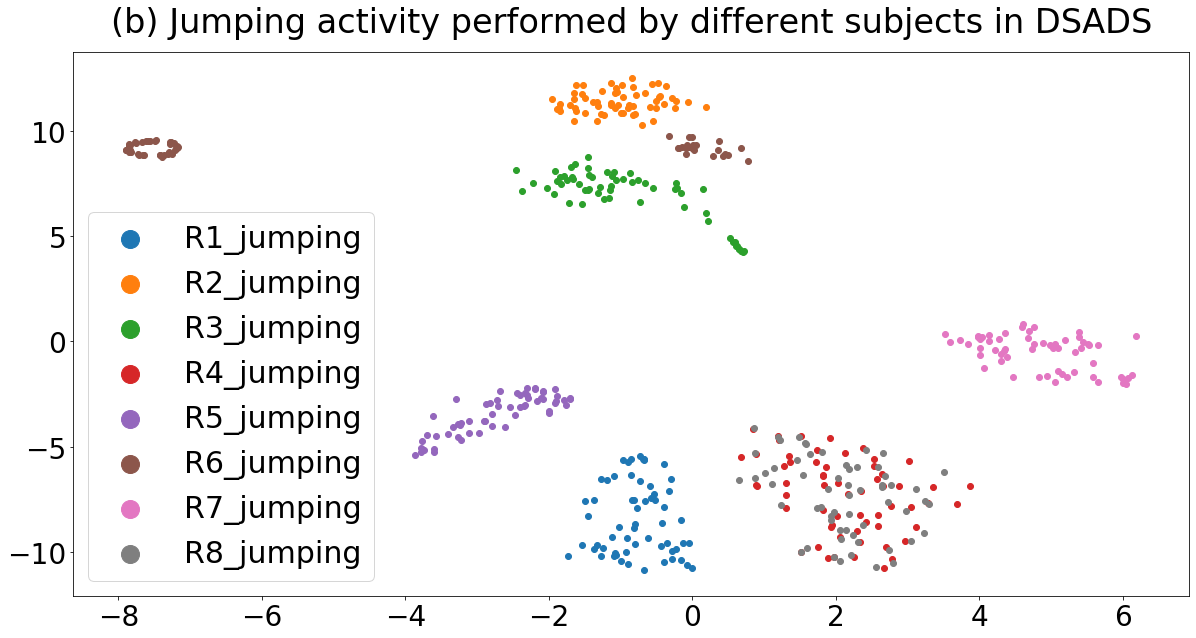

In [44]:
# print(df["ActivityID"].unique())
for aid in [18]:
    (labels, x, y) = prepare(df, aid)
    plotTNSE(labels, x, y, title="(b) Jumping activity performed by different subjects in DSADS")
    break


# PAMAP

In [45]:
import scipy.io
filename = ""
mat = scipy.io.loadmat('../../Dataset/PAMAP2/pamap.mat')
raw = pd.DataFrame(mat["data_pamap"])

columns = ["Feat"+str(i) for i in range(243)] + ["ActivityID", "PersonID"]
raw.columns = columns



In [46]:
activityNames = [None, "lying", "sitting", "standing", "walking", "running", "cycling", "Nordic walking", None, "watching TV", "computer work", "car driving", "ascending stairs", "descending stairs", None, None, "vacuum cleaning", "ironing", "folding laundry", "house cleaning", "playing soccer", None, None, None, "rope jumping"]

def add_activityname(x):
    if activityNames[int(x["ActivityID"])] is None:
        return "unknown"
    
    name = "R"+str(int(x["PersonID"]))+"_"+activityNames[int(x["ActivityID"])]
    return name

raw["ActivityName"] = raw.apply(add_activityname, axis=1)
df = raw
# df = raw.drop('ActivityID', 1)
df = df.drop('PersonID', 1)

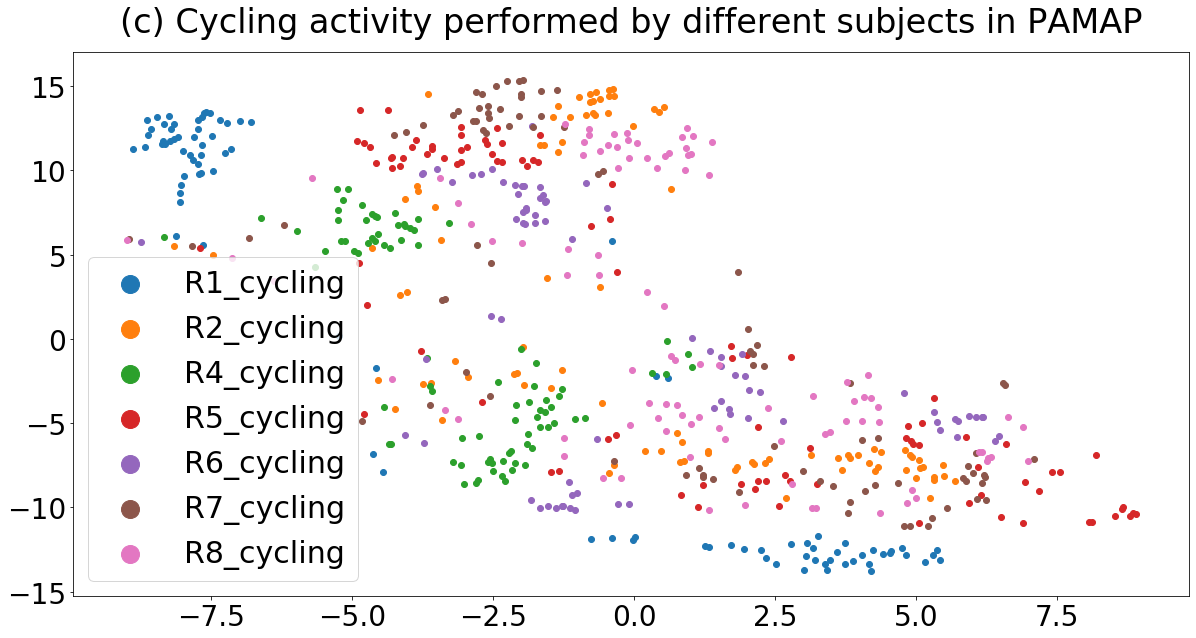

In [47]:
# for aid in df["ActivityID"].unique():
for aid in [6]:
    (labels, x, y) = prepare(df, aid)
    plotTNSE(labels, x, y, title="(c) Cycling activity performed by different subjects in PAMAP")